# Transient Analysis of 2:1 Switched Capacitor DC-DC Converter


This analysis investigates the transient behavior of a 2:1 switched capacitor DC-DC converter under various operating conditions. The parameters varied include capacitance, frequency, and load resistance. The results highlight the converter's performance metrics, such as voltage ripple and settling time, for each scenario.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import minimize
import seaborn as sns


### 1. Varying Load Capacitance (`C_load`) Without Load

- **Objective:**  
  To evaluate the transient response of the converter as `C_load` is varied from `0.01 nF` to `10.10 nF` with a fixed clock frequency of `250 kHz` under no-load conditions.  
---

  - #### Transient response curves for different `C_load`.
---

In [2]:
csv_file_path = 'results/capacitance_simulation_results.csv'
df1 = pd.read_csv(csv_file_path)
capacitor_values = df1['C(nF)'].unique()
print(capacitor_values)

[1.000e-02 5.100e-01 1.010e+00 1.510e+00 2.010e+00 2.510e+00 3.010e+00
 3.510e+00 4.010e+00 4.510e+00 5.010e+00 5.510e+00 6.010e+00 6.510e+00
 7.010e+00 7.510e+00 8.010e+00 8.510e+00 9.010e+00 9.510e+00 1.001e+01]


C:\Users\IMRAN NAZIR\AppData\Local\Temp\ipykernel_7080\2352450938.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


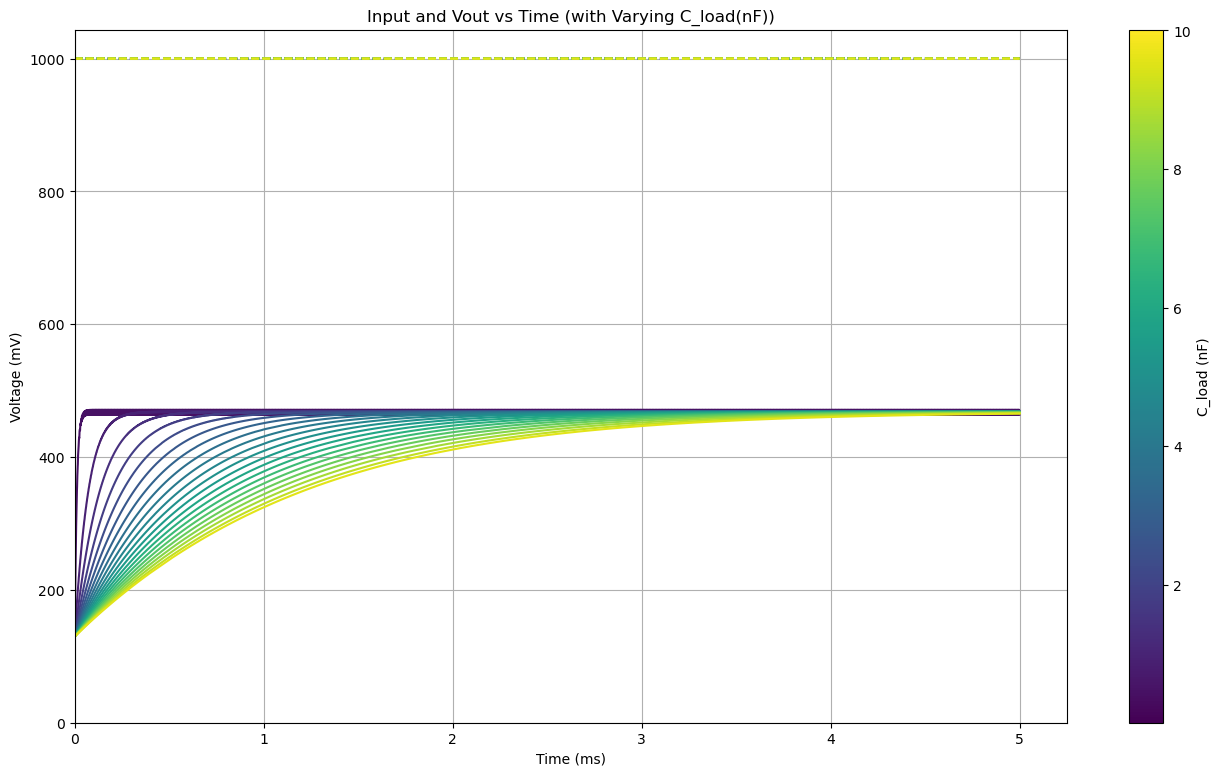

In [3]:
unique_c_values = df1['C(nF)'].unique()
palette = sns.color_palette("viridis", len(unique_c_values))

plt.figure(figsize=(16, 9))

for i, c_value in enumerate(sorted(unique_c_values)):
    df_c = df1[df1['C(nF)'] == c_value]
    color = palette[i]  
    plt.plot(df_c['Time (ms)'], df_c['Input (mV)'], color=color, label=f'C={c_value} nF', linestyle='--')
    plt.plot(df_c['Time (ms)'], df_c['Vout (mV)'], color=color)

plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Input and Vout vs Time (with Varying C_load(nF))')
plt.grid(True)

plt.xlim(left=0)
plt.ylim(bottom=0)

sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=min(unique_c_values), vmax=max(unique_c_values)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('C_load (nF)')

plt.show()


#### Insights from Load Capacitance Sweep Analysis:


1. **Voltage Behavior**: For a **DC source of 1V**, the **Input voltage** is expected to remain constant at **1000 mV**, while the **Output voltage** exhibits a transient response before stabilizing over time.
2. **Capacitance Effect**: The **Output voltage** rise time increases with larger capacitance values (indicated by yellow curves), reflecting slower charging of the capacitor, while smaller capacitances (purple curves) settle more quickly.
3. **General Observation**: The plot demonstrates the effect of varying load capacitance on the transient response in a DC circuit, where higher capacitances lead to a delayed steady-state output.
---

- #### Observations on voltage ripple and settling time with `C_load`
---

In [4]:
df2 = pd.read_csv("results/comprehensive_analysis_C1.csv")


In [5]:
df2

,Capacitance (C1) [nF],Peak Voltage [mV],Min Voltage [mV],Ripple Voltage [mV],Settling Time (ms)
0,0.01,471.293241,129.625931,341.667295,0.041319
1,0.51,468.891829,129.625931,339.265883,0.233319
2,1.01,468.678981,129.625931,339.053035,0.425319
3,1.51,468.599409,129.625931,338.973463,0.617319
4,2.01,468.557775,129.625931,338.931859,0.809439
5,2.51,468.532175,129.625931,338.906229,1.001752
6,3.01,468.514770,129.625931,338.888824,1.197319
7,3.51,468.501866,129.625931,338.875949,1.389319
8,4.01,468.490452,129.625931,338.864505,1.581319
9,4.51,468.476564,129.625931,338.850617,1.773319


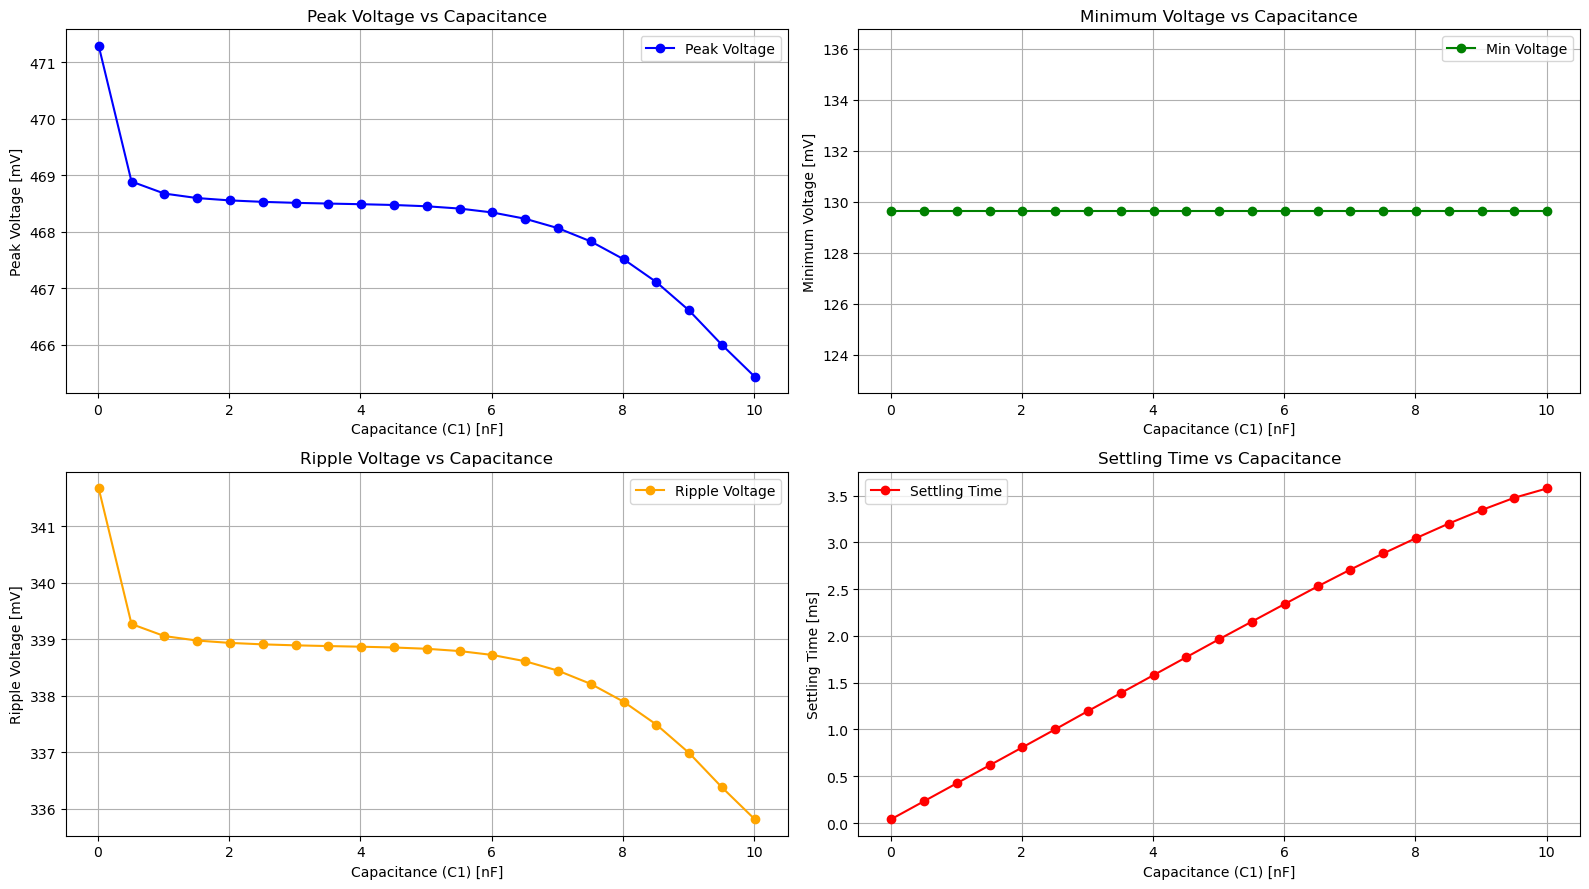

In [6]:

plt.figure(figsize=(16, 9))

plt.subplot(2, 2, 1)
plt.plot(df2['Capacitance (C1) [nF]'], df2['Peak Voltage [mV]'], marker='o', label='Peak Voltage', color='blue')
plt.xlabel('Capacitance (C1) [nF]')
plt.ylabel('Peak Voltage [mV]')
plt.title('Peak Voltage vs Capacitance')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df2['Capacitance (C1) [nF]'], df2['Min Voltage [mV]'], marker='o', label='Min Voltage', color='green')
plt.xlabel('Capacitance (C1) [nF]')
plt.ylabel('Minimum Voltage [mV]')
plt.title('Minimum Voltage vs Capacitance')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df2['Capacitance (C1) [nF]'], df2['Ripple Voltage [mV]'], marker='o', label='Ripple Voltage', color='orange')
plt.xlabel('Capacitance (C1) [nF]')
plt.ylabel('Ripple Voltage [mV]')
plt.title('Ripple Voltage vs Capacitance')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df2['Capacitance (C1) [nF]'], df2['Settling Time (ms)'], marker='o', label='Settling Time', color='red')
plt.xlabel('Capacitance (C1) [nF]')
plt.ylabel('Settling Time [ms]')
plt.title('Settling Time vs Capacitance')
plt.grid(True)
plt.legend()

plt.tight_layout()

plt.show()


Based on the transient analysis results of varying load capacitance for a 2:1 switched capacitor DC-DC converter with a frequency of 250 kHz and switch capacitance of 10 pF, the following insights were observed:


1. **Peak Voltage**: The peak voltage was found to slightly decrease as the load capacitance increased. Starting from 471.29 mV at 0.01 nF, it gradually reduced to 465.44 mV at 10.01 nF. This indicates that the system's ability to maintain a high voltage diminishes with larger capacitance, suggesting that increasing load capacitance has a minor effect on the converter’s voltage regulation.

2. **Ripple Voltage**: The ripple voltage showed a marginal decrease from 341.67 mV to 335.81 mV as the load capacitance increased. This implies that larger load capacitances help in smoothing the voltage output more effectively, thereby reducing voltage fluctuations.

3. **Settling Time**: An increase in settling time was observed with an increase in load capacitance. Settling time started at 0.041 ms for 0.01 nF and rose to 3.577 ms for 10.01 nF. This suggests that larger capacitances result in slower stabilization times after transient events, likely due to the increased time required for the larger capacitors to charge/discharge.
---

### Key Insights:
- **Larger Load Capacitance**: As the load capacitance increases, the peak voltage slightly reduces, ripple voltage decreases, and settling time increases. This reveals a trade-off where increasing capacitance improves voltage stability (reduced ripple) but results in slower transient responses (longer settling time).
- **Optimization**: The challenge lies in balancing load capacitance to minimize ripple and settling time while maintaining the peak voltage within the desired range.

---

#### Optimal Capacitance Determination
---

In [7]:
scaler = MinMaxScaler()

df2['Scaled_Ripple_Voltage [mV]'] = scaler.fit_transform(df2[['Ripple Voltage [mV]']])
df2['Scaled_Settling_Time (ms)'] = scaler.fit_transform(df2[['Settling Time (ms)']])

def compute_objective(alpha, df):
    w1 = np.exp(alpha) / (np.exp(alpha) + np.exp(1 - alpha))
    w2 = np.exp(1 - alpha) / (np.exp(alpha) + np.exp(1 - alpha))

    df['Objective'] = w1 * df['Scaled_Ripple_Voltage [mV]'] + w2 * df['Scaled_Settling_Time (ms)']
    
    X = df[['Capacitance (C1) [nF]']]
    y = df['Objective']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    df['Predicted_Objective'] = model.predict(X)
    return df['Predicted_Objective'].min()

result = minimize(
    lambda alpha: compute_objective(alpha, df2.copy()),  
    x0=0.5, 
    bounds=[(0, 1)],  
    method='L-BFGS-B'
)

optimal_alpha = result.x[0]
w1 = np.exp(optimal_alpha) / (np.exp(optimal_alpha) + np.exp(1 - optimal_alpha))
w2 = np.exp(1 - optimal_alpha) / (np.exp(optimal_alpha) + np.exp(1 - optimal_alpha))

df2['Objective'] = w1 * df2['Scaled_Ripple_Voltage [mV]'] + w2 * df2['Scaled_Settling_Time (ms)']
X = df2[['Capacitance (C1) [nF]']]
y = df2['Objective']

model = GradientBoostingRegressor(random_state=42)
model.fit(X, y)

df2['Predicted_Objective'] = model.predict(X)

optimal_index = df2['Predicted_Objective'].idxmin()
optimal_capacitance = df2.loc[optimal_index, 'Capacitance (C1) [nF]']
optimal_peak_voltage = df2.loc[optimal_index, 'Peak Voltage [mV]']
optimal_settling_time = df2.loc[optimal_index, 'Settling Time (ms)']
optimal_ripple_voltage = df2.loc[optimal_index, 'Ripple Voltage [mV]']

print(f"Optimal Alpha: {optimal_alpha}")
print(f"Optimal Weights: w1 = {w1}, w2 = {w2}")
print(f"Optimal Capacitance: {optimal_capacitance} nF")
print(f'Associated Peak Voltage: {optimal_peak_voltage:.4F} mV')
print(f'Associated Settling Time: {optimal_settling_time:.4F} ms')
print(f'Associated Ripple Voltage: {optimal_ripple_voltage:.4F} mV')


Optimal Alpha: 0.0
Optimal Weights: w1 = 0.2689414213699951, w2 = 0.7310585786300049
Optimal Capacitance: 0.51 nF
Associated Peak Voltage: 468.8918 mV
Associated Settling Time: 0.2333 ms
Associated Ripple Voltage: 339.2659 mV



---
- **Frequency (F_clk):** 250 KHz  
- **Optimal Capacitance Value:** 0.51 nF  
- **Associated Peak Voltage:** 468.8918 mV
- **Associated Settling Time:** 0.2333 ms
- **Associated Ripple Voltage:** 339.2659 mV

The optimal capacitance value of 0.51 nF was determined based on transient analysis under the specified operating conditions.

---


 ####  Varying Clock Frequency (`F_clk`) Without Load  
 
**Objective:**  
  To study the effect of clock frequency variation on the converter's transient response with `C_load = 0.5 nF` under no-load conditions. Frequency ranges from `20 kHz` to `1020 kHz`.  
  
---
  
 

 

  - #### Transient response for a range of `F_clk`.
  ---

In [8]:

csv_file_path = 'results/frequency_sweep_simulation_results.csv'
df3 = pd.read_csv(csv_file_path)
sweep_frequencies = df3['Frequency (KHz)'].unique()
print(sweep_frequencies)


[  20   70  120  170  220  270  320  370  420  470  520  570  620  670
  720  770  820  870  920  970 1020]


C:\Users\IMRAN NAZIR\AppData\Local\Temp\ipykernel_7080\2865220104.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


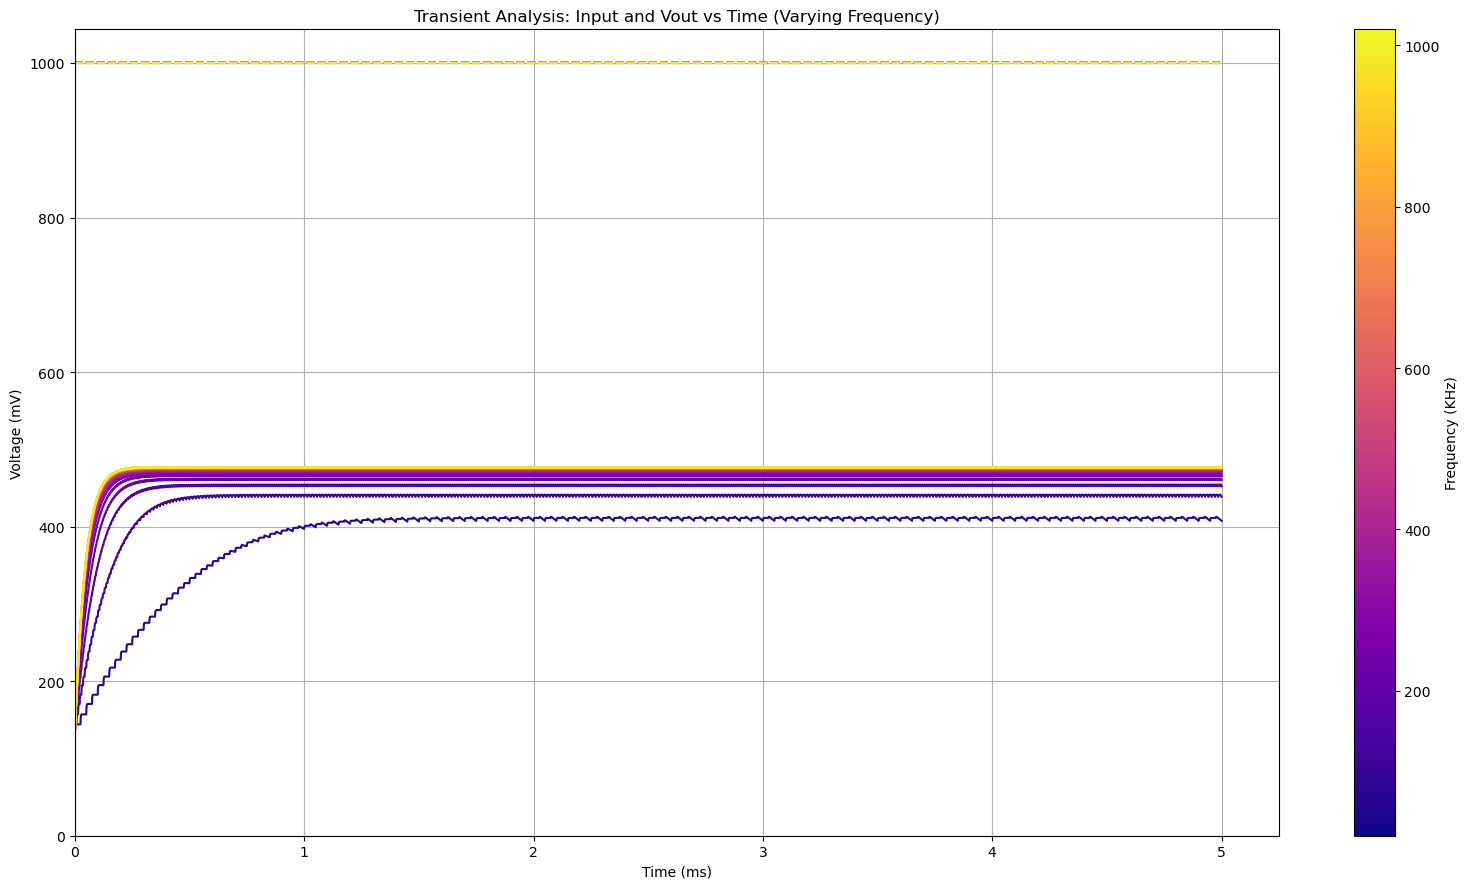

In [9]:

palette = sns.color_palette("plasma", len(sweep_frequencies))


plt.figure(figsize=(16, 9))

for i, freq in enumerate(sorted(sweep_frequencies)):
    df_freq = df3[df3['Frequency (KHz)'] == freq]
    color = palette[i]  # Assign color based on frequency
    plt.plot(df_freq['Time (ms)'], df_freq['Input (mV)'], color=color, linestyle='--', label=f'Input @ {freq} KHz')
    plt.plot(df_freq['Time (ms)'], df_freq['Vout (mV)'], color=color, label=f'Vout @ {freq} KHz')

plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Transient Analysis: Input and Vout vs Time (Varying Frequency)')
plt.grid(True)

plt.xlim(left=0)
plt.ylim(bottom=0)

sm = plt.cm.ScalarMappable(cmap="plasma", norm=plt.Normalize(vmin=min(sweep_frequencies), vmax=max(sweep_frequencies)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Frequency (KHz)')

plt.tight_layout()
plt.show()


### Insights from Frequency Sweep Analysis:

1. **Input Voltage Stability**: The input voltage remains constant at approximately 1V DC across all frequencies, as expected for a stable DC source.

2. **Output Voltage Behavior**: The output voltage (`Vout`) shows transient behavior initially, with a settling time that varies with the frequency. Higher frequencies tend to stabilize the output voltage quicker compared to lower frequencies.

3. **Impact of Frequency**: The ripple in the output voltage reduces at higher frequencies, indicating better filtering and stability in the circuit's response.

4. **General Observation**: As the frequency increases, the circuit exhibits improved transient performance, demonstrating the dependency of circuit stability on operating frequency during a frequency sweep.

---

- #### Observations on voltage ripple and settling time with `C_load`

---

In [10]:
file_path = "results/comprehensive_analysis_F_Osc.csv"
df4 = pd.read_csv(file_path)

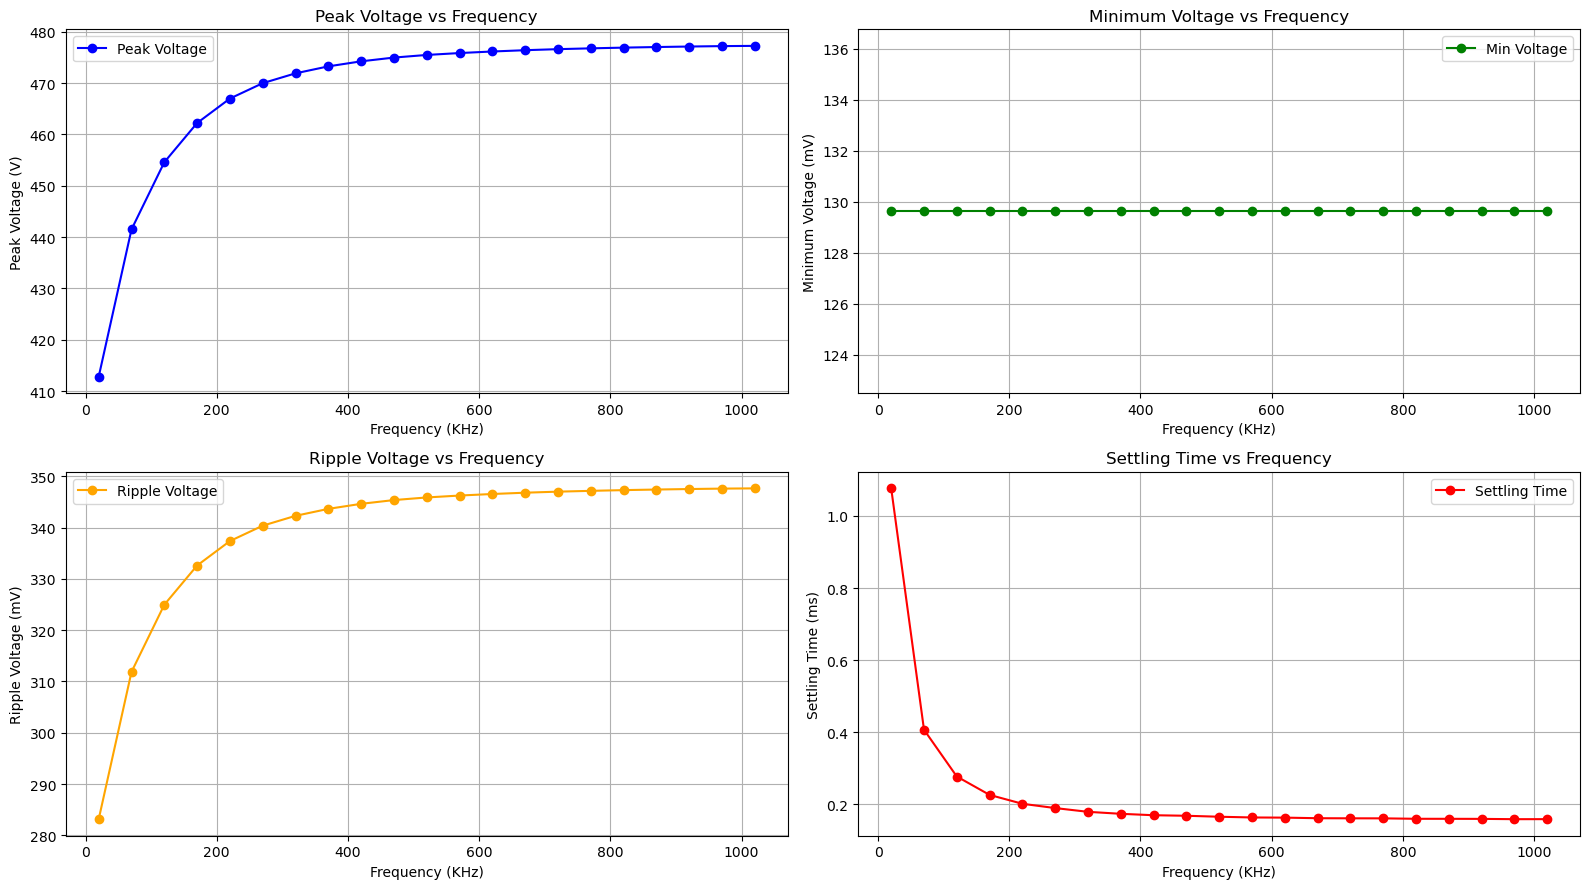

In [11]:

plt.figure(figsize=(16, 9))


plt.subplot(2, 2, 1)
plt.plot(df4['Frequency (KHz)'], df4['Peak Voltage (mV)'], marker='o', label='Peak Voltage', color='blue')
plt.xlabel('Frequency (KHz)')
plt.ylabel('Peak Voltage (V)')
plt.title('Peak Voltage vs Frequency')
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(df4['Frequency (KHz)'], df4['Min Voltage (mV)'], marker='o', label='Min Voltage', color='green')
plt.xlabel('Frequency (KHz)')
plt.ylabel('Minimum Voltage (mV)')
plt.title('Minimum Voltage vs Frequency')
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(df4['Frequency (KHz)'], df4['Ripple Voltage (mV)'], marker='o', label='Ripple Voltage', color='orange')
plt.xlabel('Frequency (KHz)')
plt.ylabel('Ripple Voltage (mV)')
plt.title('Ripple Voltage vs Frequency')
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(df4['Frequency (KHz)'], df4['Settling Time (ms)'], marker='o', label='Settling Time', color='red')
plt.xlabel('Frequency (KHz)')
plt.ylabel('Settling Time (ms)')
plt.title('Settling Time vs Frequency')
plt.grid(True)
plt.legend()


plt.tight_layout()


plt.show()  

The Graph provides insights into the transient analysis of a 2:1 switched capacitor DC-DC converter with varying clock frequencies, while maintaining a load capacitance of 0.5nF and switch capacitance of 10pF. Key observations include:



1. **Peak Voltage**: The peak voltage increases with clock frequency, starting from 412.80 mV at 20 kHz to 477.25 mV at 1020 kHz. This suggests that higher clock frequencies lead to a higher peak voltage, indicating improved voltage regulation as the frequency increases.

2. **Ripple Voltage**: The ripple voltage also increases with frequency, from 283.17 mV at 20 kHz to 347.63 mV at 1020 kHz. This indicates that higher frequencies may increase the fluctuation in the output voltage, potentially affecting the stability of the converter.

3. **Settling Time**: The settling time decreases significantly as the clock frequency increases. Starting at 1.08 ms at 20 kHz, it drops to 0.16 ms at 1020 kHz. This shows that higher clock frequencies allow the system to reach a stable state faster after a transient event, improving transient response.

---

### Key Insights:
- **Increasing Clock Frequency**: As the clock frequency increases, the peak voltage rises, but ripple voltage also increases. However, the settling time improves, suggesting that higher frequencies provide faster stabilization, but with trade-offs in ripple control.
- **Optimization Consideration**: To balance between faster settling times and acceptable ripple levels, selecting an optimal clock frequency is crucial based on the specific requirements of the application.

---


#### Optimal Frequency Determination

---

In [12]:
scaler = MinMaxScaler()

df4['Scaled_Ripple_Voltage (mV)'] = scaler.fit_transform(df4[['Ripple Voltage (mV)']])
df4['Scaled_Settling_Time (ms)'] = scaler.fit_transform(df4[['Settling Time (ms)']])

def compute_objective(alpha, df):
    w1 = np.exp(alpha) / (np.exp(alpha) + np.exp(1 - alpha))
    w2 = np.exp(1 - alpha) / (np.exp(alpha) + np.exp(1 - alpha))
    df['Objective'] = w1 * df['Scaled_Ripple_Voltage (mV)'] + w2 * df['Scaled_Settling_Time (ms)']
    X = df[['Frequency (KHz)']]
    y = df['Objective']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    df['Predicted_Objective'] = model.predict(X)
    return df['Predicted_Objective'].min()

result = minimize(
    lambda alpha: compute_objective(alpha, df4.copy()),
    x0=0.5,
    bounds=[(0, 1)],
    method='L-BFGS-B'
)

optimal_alpha = result.x[0]
w1 = np.exp(optimal_alpha) / (np.exp(optimal_alpha) + np.exp(1 - optimal_alpha))
w2 = np.exp(1 - optimal_alpha) / (np.exp(optimal_alpha) + np.exp(1 - optimal_alpha))

df4['Objective'] = w1 * df4['Scaled_Ripple_Voltage (mV)'] + w2 * df4['Scaled_Settling_Time (ms)']
X = df4[['Frequency (KHz)']]
y = df4['Objective']

model = GradientBoostingRegressor(random_state=42)
model.fit(X, y)

df4['Predicted_Objective'] = model.predict(X)

optimal_index = df4['Predicted_Objective'].idxmin()
optimal_frequency = df4.loc[optimal_index, 'Frequency (KHz)']
optimal_peak_voltage = df4.loc[optimal_index, 'Peak Voltage (mV)']
optimal_ripple_voltage = df4.loc[optimal_index, 'Ripple Voltage (mV)']
optimal_settling_time = df4.loc[optimal_index, 'Settling Time (ms)']

print(f"Optimal Alpha: {optimal_alpha}")
print(f"Optimal Weights: w1 = {w1}, w2 = {w2}")
print(f"Optimal Frequency: {optimal_frequency} KHz")
print(f'Associated Peak Voltage: {optimal_peak_voltage:.4F} mV')
print(f'Associated Settling Time: {optimal_settling_time:.4F} ms')
print(f'Associated Ripple Voltage: {optimal_ripple_voltage:.4F} mV')


Optimal Alpha: 0.0
Optimal Weights: w1 = 0.2689414213699951, w2 = 0.7310585786300049
Optimal Frequency: 170 KHz
Associated Peak Voltage: 462.2207 mV
Associated Settling Time: 0.2266 ms
Associated Ripple Voltage: 332.5948 mV


---
- **Capacitance (C_load):** 0.5 nF  
- **Optimal Frequency:** 170 KHz  
- **Associated Peak Voltage:** 462.2207 mV
- **Associated Settling Time:** 0.2266 ms
- **Associated Ripple Voltage:** 332.5948 mV

The optimal frequency of 170 KHz was determined based on transient analysis with a fixed capacitance load of 0.5 nF.

---


In [13]:
df4

,Frequency (KHz),Peak Voltage (mV),Min Voltage (mV),Ripple Voltage (mV),Settling Time (ms),Scaled_Ripple_Voltage (mV),Scaled_Settling_Time (ms),Objective,Predicted_Objective
0,20,412.795156,129.625931,283.169210,1.076313,0.000000,1.000000,0.731059,0.731025
1,70,441.489249,129.625931,311.863303,0.407227,0.445154,0.270380,0.317384,0.317369
2,120,454.580098,129.625931,324.954152,0.277577,0.648242,0.129001,0.268646,0.268647
3,170,462.220728,129.625931,332.594812,0.226554,0.766778,0.073362,0.259850,0.259915
4,220,466.986001,129.625931,337.360084,0.201964,0.840705,0.046546,0.260128,0.260144
5,270,469.984829,129.625931,340.358913,0.190093,0.887228,0.033602,0.263177,0.263096
6,320,471.902013,129.625931,342.276096,0.179658,0.916971,0.022223,0.262858,0.262952
7,370,473.260134,129.625931,343.634188,0.174184,0.938040,0.016254,0.264160,0.264163
8,420,474.242508,129.625931,344.616592,0.170239,0.953281,0.011951,0.265114,0.265125
9,470,474.975288,129.625931,345.349371,0.168756,0.964649,0.010334,0.266989,0.266951


### 3. Varying Load Resistance (`R_load`) 

- **Objective:**  
  To assess the transient performance of the converter with `R_load` varied from `10 kΩ` to `1010 kΩ`, `C_load = 0.5 nF`, and `F_clk = 250 kHz`.  


---


 
  - ### Transient response for different `R_load` values.  

---
 


In [14]:
csv_file_path = 'results/load_simulation_results.csv'
df5 = pd.read_csv(csv_file_path)
load_resistances = df5['R(kΩ)'].unique()
print(load_resistances)

[  10   60  110  160  210  260  310  360  410  460  510  560  610  660
  710  760  810  860  910  960 1010]


C:\Users\IMRAN NAZIR\AppData\Local\Temp\ipykernel_7080\1124709841.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


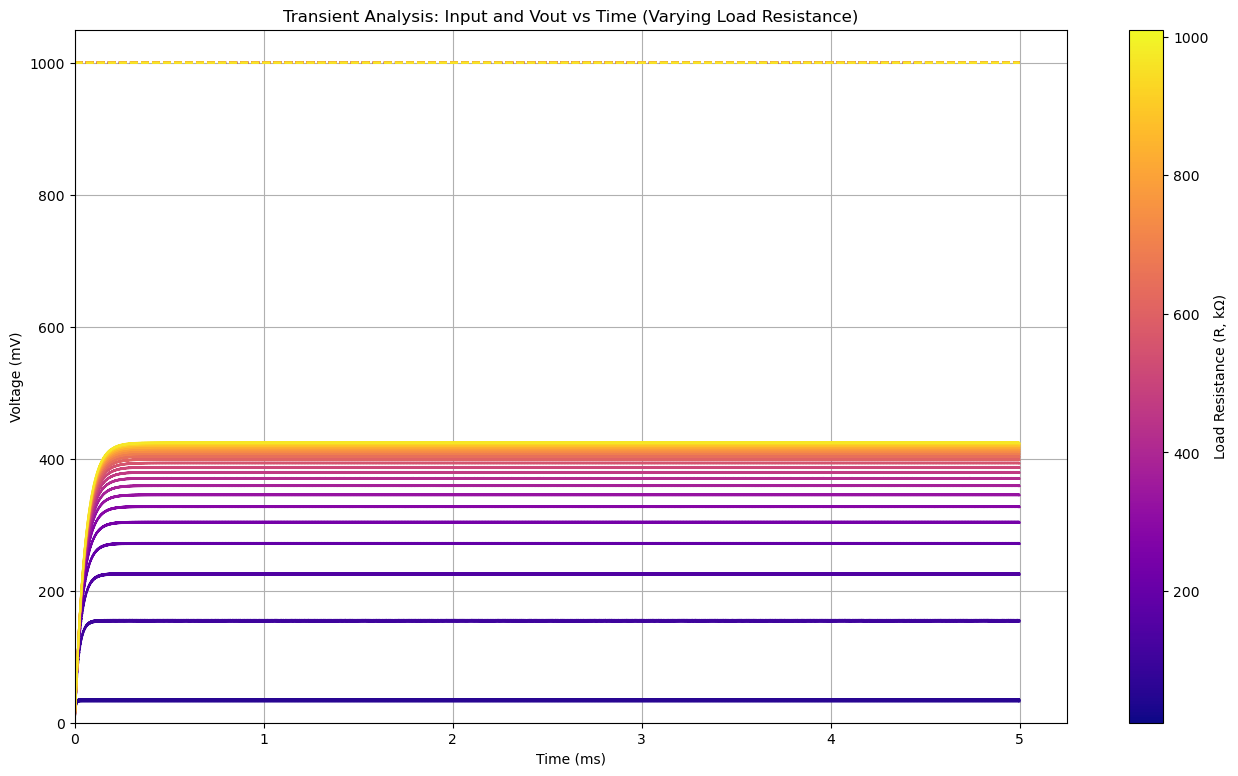

In [15]:

palette = sns.color_palette("plasma", len(load_resistances))

plt.figure(figsize=(16, 9))


for i, r_value in enumerate(sorted(load_resistances)):
    df_r = df5[df5['R(kΩ)'] == r_value]
    color = palette[i]  
    plt.plot(df_r['Time (ms)'], df_r['Input (mV)'], color=color, linestyle='--', label=f'R={r_value} kΩ (Input)')
    plt.plot(df_r['Time (ms)'], df_r['Vout (mV)'], color=color, label=f'R={r_value} kΩ (Vout)')


plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Transient Analysis: Input and Vout vs Time (Varying Load Resistance)')
plt.grid(True)
plt.xlim(left=0)
plt.ylim(bottom=0)

sm = plt.cm.ScalarMappable(cmap="plasma", norm=plt.Normalize(vmin=min(load_resistances), vmax=max(load_resistances)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Load Resistance (R, kΩ)')

plt.show()


### Insights from Load Resistance Sweep Analysis:

1. **Input Voltage Stability**: The input voltage remains constant at approximately 1V DC across all load resistances, as expected for a stable DC source.

2. **Output Voltage Behavior**: The output voltage (`Vout`) shows transient behavior initially, with a settling time that varies with the load resistance. Higher load resistances tend to stabilize the output voltage quicker compared to lower load resistances.

3. **Impact of Load Resistance**: The ripple in the output voltage reduces at higher load resistances, indicating better filtering and stability in the circuit's response.

4. **General Observation**: As the load resistance increases, the circuit exhibits improved transient performance, demonstrating the dependency of circuit stability on load resistance during a transient analysis.

---

 
- ### The impact of varying `R_load` on voltage ripple and Output Power.  

---

In [16]:
file_path = "results/comprehensive_analysis_R1.csv"
df6 = pd.read_csv(file_path)

In [17]:
df6

,Resistance (KΩ),Peak Voltage (mV),Min Voltage (mV),Ripple Voltage (mV),Settling Time (ms),Output Power (mW)
0,10,35.677657,0.000040,35.677616,0.018657,0.127290
1,60,155.894190,0.000241,155.893952,0.082773,0.405050
2,110,226.513609,0.000442,226.513162,0.118657,0.466440
3,160,272.395521,0.000643,272.394866,0.140624,0.463746
4,210,304.479808,0.000844,304.478973,0.156656,0.441466
5,260,328.108758,0.001045,328.107715,0.168829,0.414059
6,310,345.800072,0.001246,345.798820,0.173266,0.385734
7,360,359.796762,0.001447,359.795302,0.180952,0.359594
8,410,370.937586,0.001648,370.935947,0.184656,0.335597
9,460,379.988909,0.001849,379.987061,0.188656,0.313895


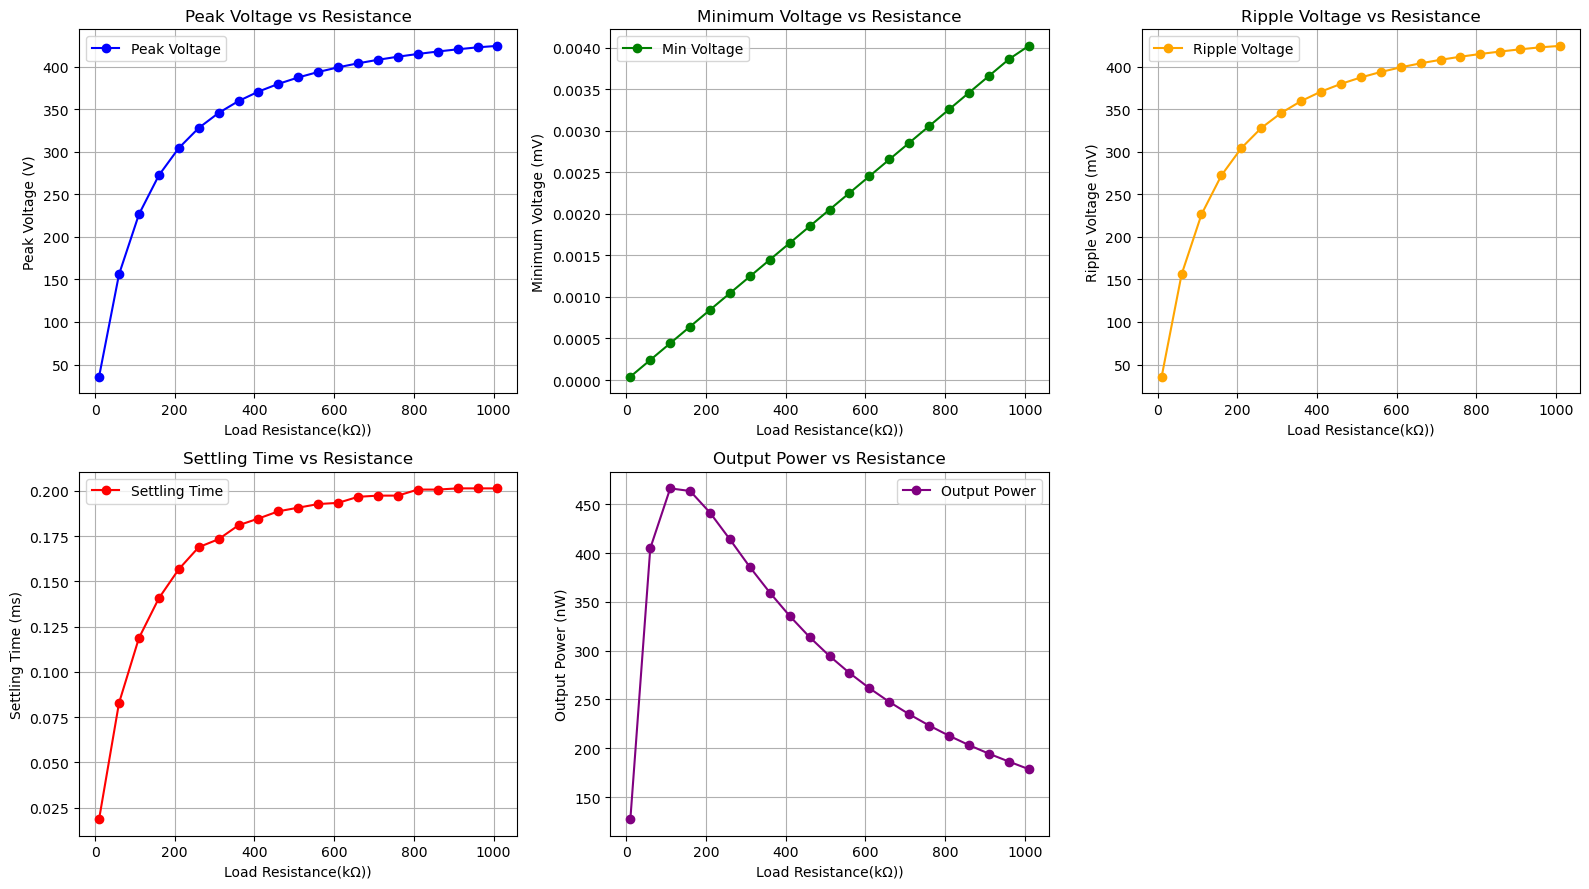

In [18]:
plt.figure(figsize=(16, 9))

plt.subplot(2, 3, 1)
plt.plot(df6['Resistance (KΩ)'], df6['Peak Voltage (mV)'], marker='o', label='Peak Voltage', color='blue')
plt.xlabel('Load Resistance(kΩ))')
plt.ylabel('Peak Voltage (V)')
plt.title('Peak Voltage vs Resistance')
plt.grid(True)
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(df6['Resistance (KΩ)'], df6['Min Voltage (mV)'], marker='o', label='Min Voltage', color='green')
plt.xlabel('Load Resistance(kΩ))')
plt.ylabel('Minimum Voltage (mV)')
plt.title('Minimum Voltage vs Resistance')
plt.grid(True)
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(df6['Resistance (KΩ)'], df6['Ripple Voltage (mV)'], marker='o', label='Ripple Voltage', color='orange')
plt.xlabel('Load Resistance(kΩ))')
plt.ylabel('Ripple Voltage (mV)')
plt.title('Ripple Voltage vs Resistance')
plt.grid(True)
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(df6['Resistance (KΩ)'], df6['Settling Time (ms)'], marker='o', label='Settling Time', color='red')
plt.xlabel('Load Resistance(kΩ))')
plt.ylabel('Settling Time (ms)')
plt.title('Settling Time vs Resistance')
plt.grid(True)
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(df6['Resistance (KΩ)'], df6['Output Power (mW)']*1000, marker='o', label='Output Power', color='purple')
plt.xlabel('Load Resistance(kΩ))')
plt.ylabel('Output Power (nW)')
plt.title('Output Power vs Resistance')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


The Graph shows the relationship between load resistance (ranging from 10 KΩ to 1010 KΩ) and the performance parameters (Peak Voltage, Min Voltage, Ripple Voltage,Settling Time and Output Power) at a fixed frequency of 250 kHz, with C_Load = 0.5 nF and C_Switch = 10 pF. Here are the key insights:


1. **Peak Voltage**: 
   - Increases with resistance, from 35.68 mV at 10 KΩ to 424.68 mV at 1010 KΩ.
   - This suggests that as the load resistance increases, the peak voltage output rises.

2. **Min Voltage**:
   - Increases slightly with resistance, but the values remain very small (close to 0).
   - This indicates that the system maintains a low minimum voltage across varying load resistances.

3. **Ripple Voltage**:
   - Increases with resistance, from 35.68 mV at 10 KΩ to 424.68 mV at 1010 KΩ.
   - Ripple voltage is higher at higher resistance, which implies that higher load resistance contributes to greater variations in voltage.

4. **Settling Time**:
   - Slightly increases with resistance, starting at 0.0187 ms at 10 KΩ and rising to 0.2013 ms at 1010 KΩ.
   - The longer settling time at higher resistance suggests that the system requires more time to stabilize as the load resistance increases.

5. **Output Power**:

- Decreases with resistance, starting at 127.29 nW at 10 KΩ and dropping to 178.57 nW at 1010 KΩ.
- As resistance increases, the output power decreases, suggesting that higher resistances reduce the power delivered to the load, which aligns with the inverse relationship between resistance and power in resistive circuits.
---

### Key Insights:
- As resistance increases, both peak voltage and ripple voltage increase, while settling time also rises slightly.
- The system behaves with higher voltages and slightly increased instability (due to higher ripple) at higher resistances.

---


## Optimal Load Resistance Determination

---

In [19]:
def compute_objective(df):
    X = df[['Resistance (KΩ)']] 
    y = df['Output Power (mW)']  
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)

    df['Predicted_Power'] = model.predict(X)
    
    return -df['Predicted_Power'].max()  

result = minimize(
    lambda _: compute_objective(df6.copy()),  
    x0=[1], 
    method='L-BFGS-B'
)


X = df6[['Resistance (KΩ)']]
y = df6['Output Power (mW)']

model = GradientBoostingRegressor(random_state=42)
model.fit(X, y)

df6['Predicted_Power'] = model.predict(X)

optimal_index = df6['Predicted_Power'].idxmax()
optimal_resistance = df6.loc[optimal_index, 'Resistance (KΩ)']
optimal_power = df6.loc[optimal_index, 'Output Power (mW)']  
optimal_peak_voltage = df6.loc[optimal_index, 'Peak Voltage (mV)'] 
optimal_settling_time = df6.loc[optimal_index, 'Settling Time (ms)']  
optimal_ripple_voltage= df6.loc[optimal_index, 'Ripple Voltage (mV)']  

print(f"Optimal Resistance: {optimal_resistance} KΩ")
print(f"Associated Output Power: {optimal_power*1000:.4F} nW")
print(f'Associated Peak Voltage: {optimal_peak_voltage:.4F} mV')
print(f'Associated Settling Time: {optimal_settling_time:.4F} ms')
print(f'Associated  Ripple Voltage: {optimal_ripple_voltage:.4F} mV')



Optimal Resistance: 110 KΩ
Associated Output Power: 466.4401 nW
Associated Peak Voltage: 226.5136 mV
Associated Settling Time: 0.1187 ms
Associated  Ripple Voltage: 226.5132 mV



---
- **Capacitance (C_load):** 0.5 nF  
- **Clock Frequency (F_clk):** 250 KHz  
- **Optimal Load Resistance (R_load):** 110 KΩ
- **Associated Output Power:** 466.4401 nW
- **Associated Peak Voltage:** 226.5136 mV
- **Associated Settling Time:** 0.1187 ms
- **Associated Ripple Voltage:** 226.5132 mV


The **Optimal Load Resistance (R_load)** of **466.4401 nW** was determined based on transient analysis with a fixed capacitance load of **0.5 nF**.

---




## Varying Load Capacitance `C1`, Clock Frequency `F_clk`, and Load Resistance `R_load`

- **Objective:**  
  To assess the transient performance of the converter with **C1** varied from **0.1 nF** to **1 nF**, **F_clk** varied from **100 kHz** to **250 kHz**, and **R_load** varied from **110 kΩ** to **500 kΩ**.

---

In [20]:

df7 = pd.read_csv("results/comprehensive_analysis.csv")

In [21]:
df7

,Capacitance (nF),Frequency (KHz),Resistance (kΩ),Peak Voltage (mV),Min Voltage (mV),Ripple Voltage (mV),Settling Time (ms),Output Power (nW)
0,0.10,100.0,110.0,162.286177,0.000442,162.285730,0.031834,239.425485
1,0.10,170.0,110.0,150.393382,0.000442,150.392935,0.156647,205.619721
2,0.10,250.0,110.0,149.032310,0.000442,149.031863,0.306651,201.914812
3,0.51,100.0,110.0,204.279974,0.000442,204.279527,0.027667,379.366435
4,0.51,170.0,110.0,199.277222,0.000442,199.276775,0.133566,361.012830
5,0.51,250.0,110.0,198.696509,0.000442,198.696062,0.260135,358.911843
6,1.00,100.0,110.0,229.008958,0.000442,229.008511,0.024656,476.773661
7,1.00,170.0,110.0,226.497993,0.000442,226.497546,0.120656,466.375825
8,1.00,250.0,110.0,226.181358,0.000442,226.180911,0.236667,465.072789
9,0.10,100.0,250.0,254.907578,0.001005,254.906565,0.051312,259.911494





#### Change in Output Power with Varying Capacitance, Resistance, and Frequency

---

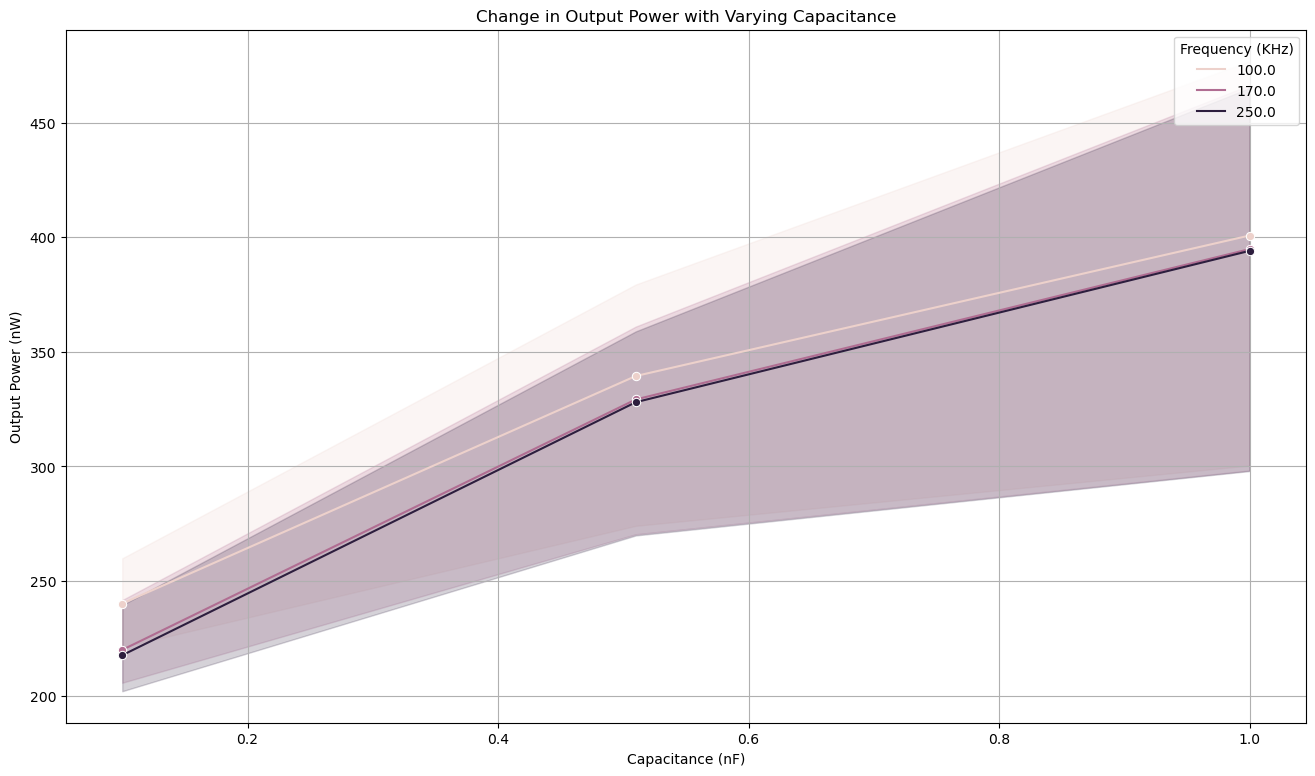

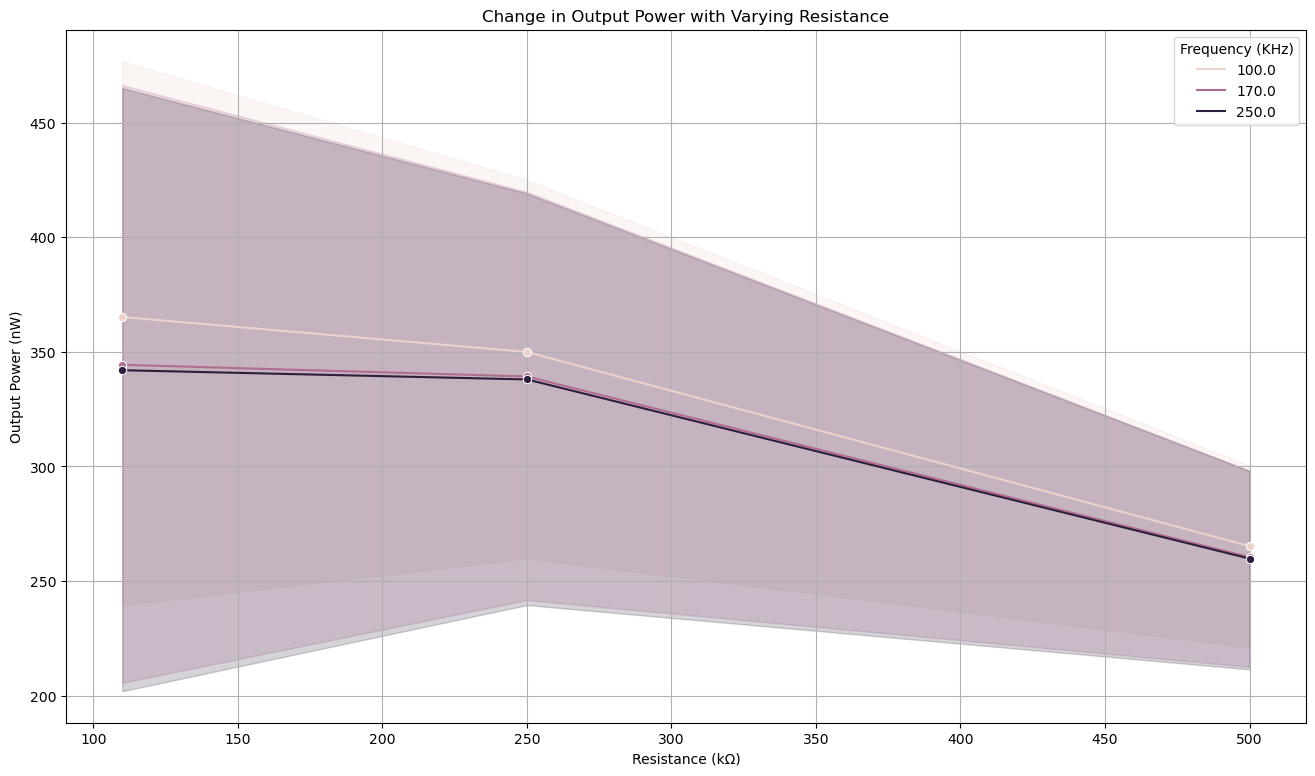

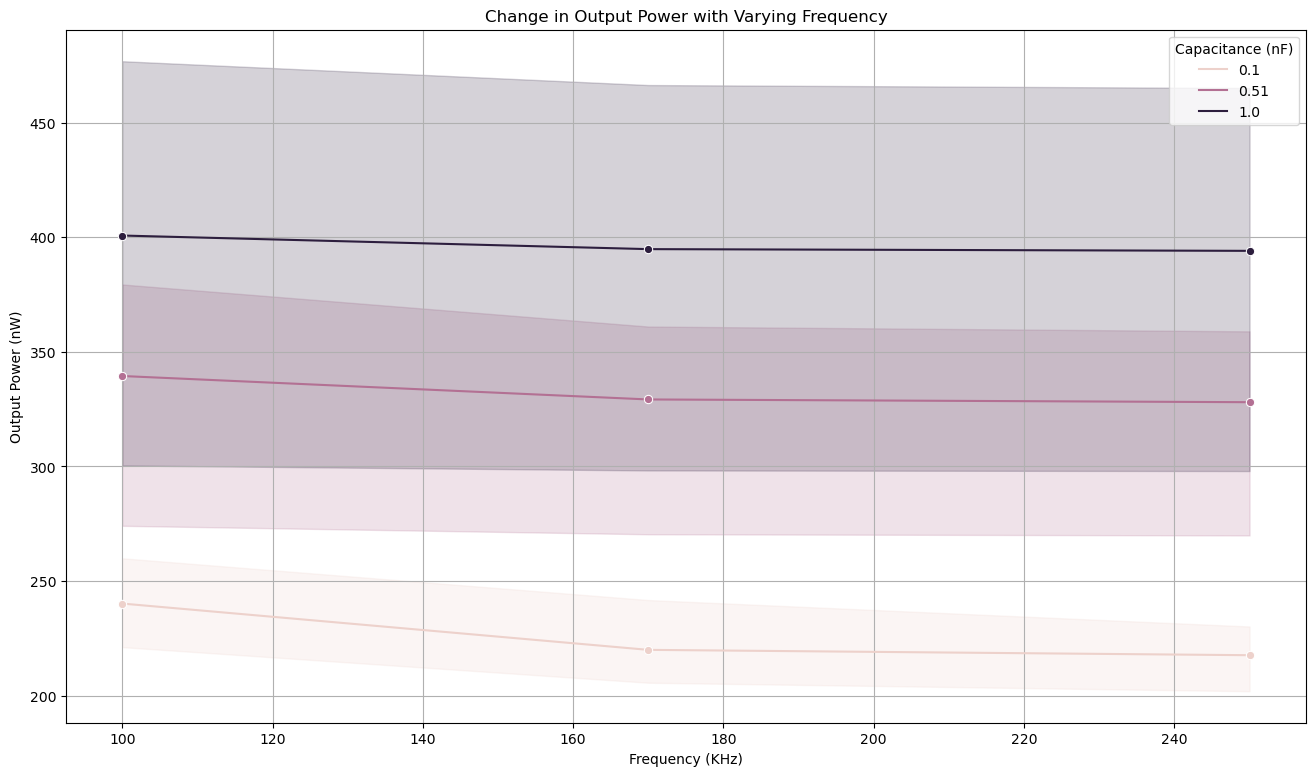

In [22]:


plt.figure(figsize=(16, 9))
sns.lineplot(data=df7, x='Capacitance (nF)', y='Output Power (nW)', hue='Frequency (KHz)', marker='o')
plt.xlabel('Capacitance (nF)')
plt.ylabel('Output Power (nW)')
plt.title('Change in Output Power with Varying Capacitance')
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 9))
sns.lineplot(data=df7, x='Resistance (kΩ)', y='Output Power (nW)', hue='Frequency (KHz)', marker='o')
plt.xlabel('Resistance (kΩ)')
plt.ylabel('Output Power (nW)')
plt.title('Change in Output Power with Varying Resistance')
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 9))
sns.lineplot(data=df7, x='Frequency (KHz)', y='Output Power (nW)', hue='Capacitance (nF)', marker='o')
plt.xlabel('Frequency (KHz)')
plt.ylabel('Output Power (nW)')
plt.title('Change in Output Power with Varying Frequency')
plt.grid(True)
plt.show()


Based on the data:

1. **Capacitance and Frequency Relationship**: Higher capacitance and frequency tend to increase peak voltage, output power, and ripple voltage, while reducing settling time.
  
2. **Ripple Voltage**: Generally increases with frequency and capacitance, especially at higher capacitances and frequencies.

3. **Output Power**: Increases with higher capacitance, frequency, and resistance.

4. **Settling Time**: Decreases as capacitance and frequency rise.

5. **Peak Voltage**: Increases with both capacitance and frequency.
---


In summary, increasing capacitance and frequency leads to better performance (higher power, lower settling time), but also results in higher ripple voltage.

---
#### "Finding and Displaying the Case with Maximum Output Power"
---

In [23]:

max_output_power_row = df7.loc[df7['Output Power (nW)'].idxmax()]


max_output_power_case = {
    'Capacitance (nF)': max_output_power_row['Capacitance (nF)'],
    'Frequency (KHz)': max_output_power_row['Frequency (KHz)'],
    'Resistance (kΩ)': max_output_power_row['Resistance (kΩ)'],
    'Peak Voltage (mV)': max_output_power_row['Peak Voltage (mV)'],
    'Min Voltage (mV)': max_output_power_row['Min Voltage (mV)'],
    'Ripple Voltage (mV)': max_output_power_row['Ripple Voltage (mV)'],
    'Settling Time (ms)': max_output_power_row['Settling Time (ms)'],
    'Output Power (nW)': max_output_power_row['Output Power (nW)'],
}

print("Maximum Output Power Case:")
for key, value in max_output_power_case.items():
    print(f"{key}: {value}")

Maximum Output Power Case:
Capacitance (nF): 1.0
Frequency (KHz): 100.0
Resistance (kΩ): 110.0
Peak Voltage (mV): 229.00895774364471
Min Voltage (mV): 0.0004421994788117
Ripple Voltage (mV): 229.0085107088089
Settling Time (ms): 0.0246563200000014
Output Power (nW): 476.77366115300407


### Insights:
- The maximum output power of **476.77 nW** occurs at a capacitance of **1.0 nF**, frequency of **100 KHz**, and resistance of **110 kΩ**.
- The peak voltage is **229.01 mV**, with a minimal ripple voltage and settling time of **0.0247 ms**.

### Conclusion:

This analysis of the 2:1 switched capacitor DC-DC converter's transient performance under varying operating conditions (capacitance, frequency, and load resistance) provides valuable insights into the converter's behavior.

1. **Capacitance Impact**:
   - **Larger Capacitance**: Increasing the load capacitance leads to a higher stability in output voltage with reduced ripple, but results in a longer settling time. The peak voltage slightly decreases with larger capacitances, indicating a trade-off between stability and response speed. The optimal capacitance for best performance was found to be **0.51 nF**, balancing output voltage, ripple, and settling time.

2. **Frequency Influence**:
   - **Higher Frequencies**: Increased clock frequency improves the transient response, reducing the settling time. However, higher frequencies lead to greater ripple voltage, indicating a trade-off between faster stabilization and increased voltage fluctuations. The optimal frequency for better performance was determined to be **170 KHz**, as it balances ripple and settling time.

3. **Load Resistance Effects**:
   - **Higher Resistance**: Increasing load resistance results in a higher peak voltage, but also increases ripple voltage and slightly delays settling time. Interestingly, higher resistance leads to reduced output power, aligning with the inverse relationship between resistance and power in resistive circuits. The optimal load resistance was found to be **110 KΩ**, where output power and transient performance are well-balanced.

4. **Maximum Output Power Case**:
   - **Optimal Conditions**: The highest output power of **476.77 nW** was observed at a capacitance of **1.0 nF**, frequency of **100 KHz**, and resistance of **110 kΩ**. At these settings, the converter achieves a peak voltage of **229.01 mV** with minimal ripple voltage and a quick settling time of **0.0247 ms**.

### Final Insights:
- **Balancing Trade-offs**: The key takeaway is that increasing capacitance and frequency tends to improve output power and reduce settling time, but can lead to higher ripple voltage. The challenge lies in optimizing these parameters to maintain a balance between power, ripple, and transient response speed.
- **Optimal Performance**: For maximum output power, the converter performs best with a **1.0 nF capacitance**, **100 KHz frequency**, and **110 kΩ load resistance**, ensuring minimal ripple and fast stabilization, making it the ideal configuration for this DC-DC converter's performance.